In [4]:
import numpy as np
import itertools
import networkx as nx

def gauss_binom(n,k,q):
    numerator = np.prod([((q ** (n-j))-1) for j in range(k)])
    denominator = np.prod([((q ** (j+1))-1) for j in range(k)])
    return int(numerator / denominator)
    
def get_grassmann_post(n, d, q):
    F = GF(q)
    V = VectorSpace(GF(q),n)
    P = set([])
    for t in itertools.product(V,repeat=d):
        P.add(V.subspace([t[i] for i in range(d)]))
    P_list = list(P)    
    P_dim = [s.dimension() for s in P ]
    for i in range(d):
        assert P_dim.count(i) == gauss_binom(n,i,q), "got {}, expected {}".format(P_dim.count(i),gauss_binom(n,i,q))
    relations = []
    for i, j in itertools.product(range(len(P)), repeat=2):
        if (P_list[i].dimension() == (P_list[j].dimension() - 1)) and P_list[i].is_subspace(P_list[j]):
            relations.append([i, j])
    elem_labs={}
    for W in P:
        elem_labs=[W.basis_matrix() for W in P_list]
    return Poset(data=(set(range(len(P))),relations)), elem_labs


# An instantiation of the poset of linear subspaces of dimension <=d of an n-dimensional linear space over the field of q elements.
# Will include methods of a cell complex such as boundary and coboundary.


class grassmann_post(object):
    def __init__(self, n, d, q):
        self.poset, self.elements_labels = get_grassmann_post(n, d, q)
        self.field_size = q
        self.coboundary_coeficients = 3 if q == 2 else 2
        self.top_rank = d-1
        for i in range(self.top_rank):
            pass
#             assert not np.any(np.matmul(self.get_couboundary_matrix(i+1), self.get_couboundary_matrix(i)) % Gr.coboundary_coeficients),  "problem with the coboundary operators: delta_{}*delta_{} != 0".format(i+1,i)
    
    def show(self):
        self.poset.show(element_labels=self.get_elements_labels())
    
    def get_level_sets(self):
        return self.poset.level_sets()
    
    def get_level_sets_lengths(self):
        return [len(l) for l in self.poset.level_sets()]
    
    def get_element(self, i, j):
        return self.poset.level_sets()[i][j]

    def boundary(self, element):
        return self.poset.lower_covers(element)
    
    def coboundary(self, elements, i, f):
        target = self.poset.level_sets()[i+1]
        l = len(target)
        g = np.zeros(l, dtype=int)
        for element in elements:
            S = self.poset.upper_covers(element)
            for i in range(l):
                if S.count(target[i]) > 0:
                    g[i] += 1
        return g % f
    
    def get_couboundary_matrix(self, i):
        domain = self.poset.level_sets()[i]
        target = self.poset.level_sets()[i+1]
        d = len(domain)
        l = len(target)
        g = np.zeros(shape=(l,d), dtype=int)
        for k in range(d):
            S = self.poset.upper_covers(domain[k])
            for j in range(l):
                if S.count(target[j]) > 0:
                    g[j][k] += 1
        return g % self.coboundary_coeficients
    
    def get_hasse_diag(self):
        return self.poset.hasse_diagram()
    
    def get_elements_labels(self):
        return dict([(i, self.elements_labels[i]) for i in range(len(self.elements_labels))])
    
    def get_nx_graph(self):
        E = self.get_hasse_diag().edges()
        pos = self.get_hasse_diag().positions()
        return nx.relabel_nodes(nx.DiGraph([(e[0], e[1]) for e in E]), self.get_elements_labels())
        
    def to_xml(self, path):
        nx.write_graphml_lxml(self.get_nx_graph(), path)

# Example

In [9]:
Gr = grassmann_post(3,3,2)

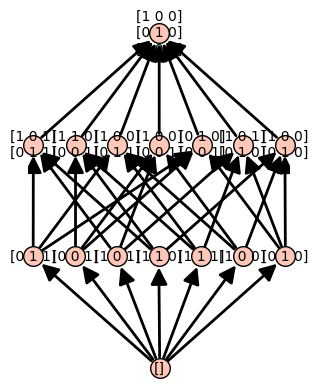

In [10]:
Gr.show()